![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

### <center>  Grupo 22 </center>

<center>David Alejandro Rojas Castro - da.rojasc123@uniandes.edu.co </center>
<center>Camila Malagón Suarez - c.malagons@uniandes.edu.co</center>
<center>Luis David Gutierrez - ld.gutierrezl1@uniandes.edu.co</center>
<center>David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Ejecutar su sale error al importar la libreria
# !pip install livelossplot
# !pip install keras
# !pip install livelossplot
# !pip install tensorflow

In [85]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [86]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


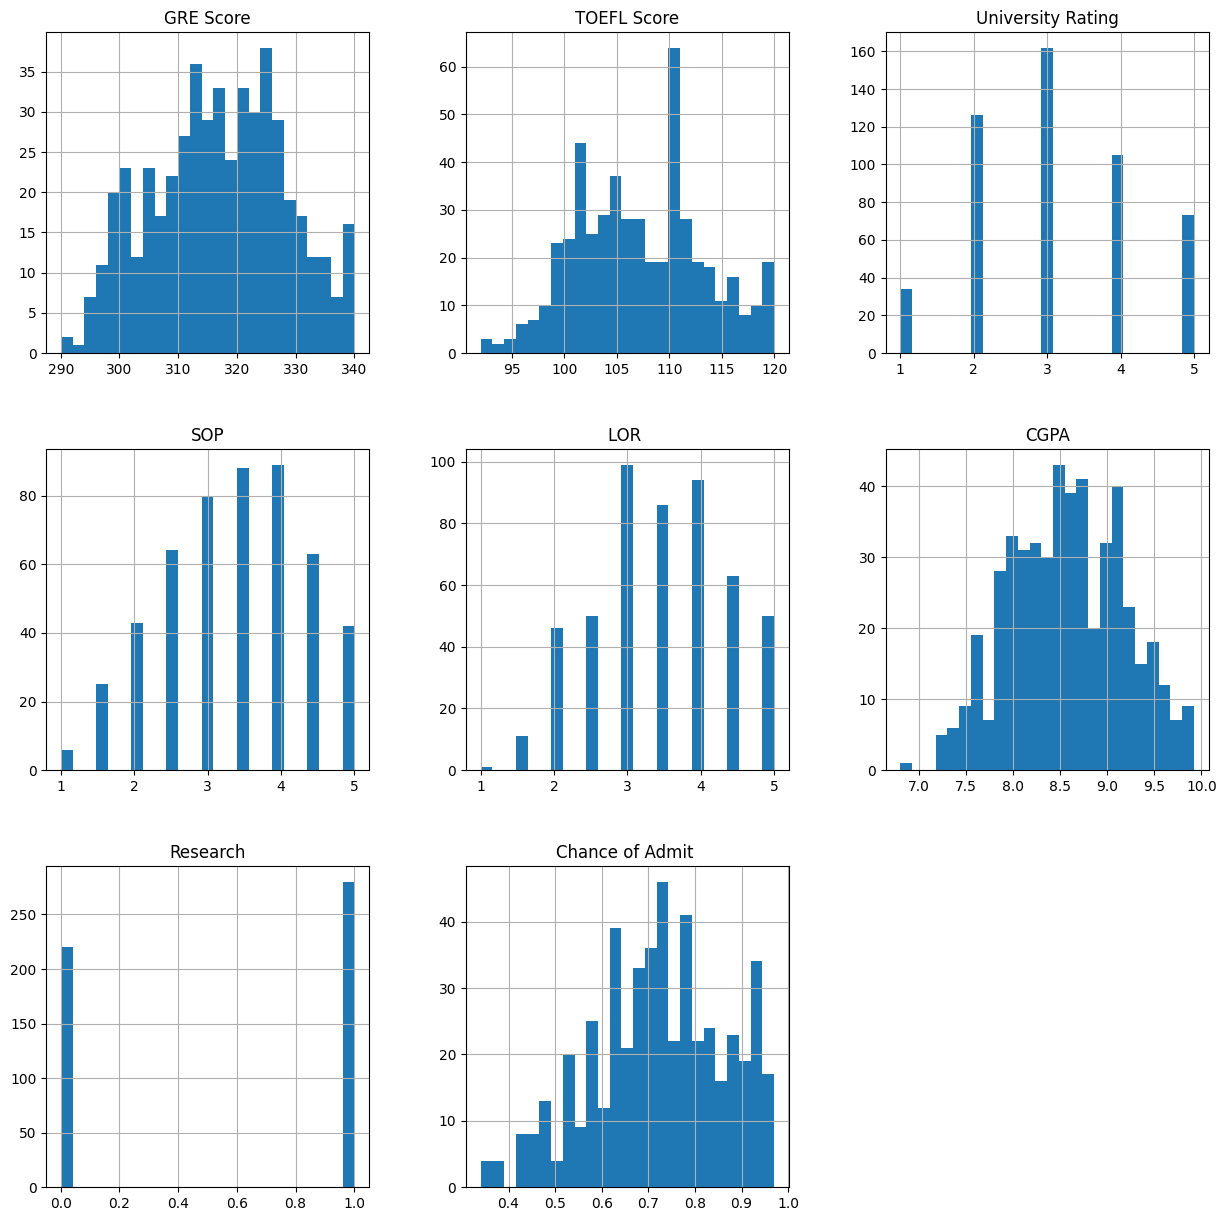

In [87]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [88]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[[data.columns[-1]]]

In [89]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [90]:
xTrain.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
429,316,103,2,2.0,4.5,8.74,0
42,316,105,2,2.5,2.5,8.20,1
219,324,110,4,3.0,3.5,8.97,1
148,326,114,3,3.0,3.0,9.11,1
13,328,112,4,4.0,4.5,9.10,1


In [91]:
# Estandarización de las variables de entrada
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [92]:
output_var = yTrain.shape[1]
output_var

1

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

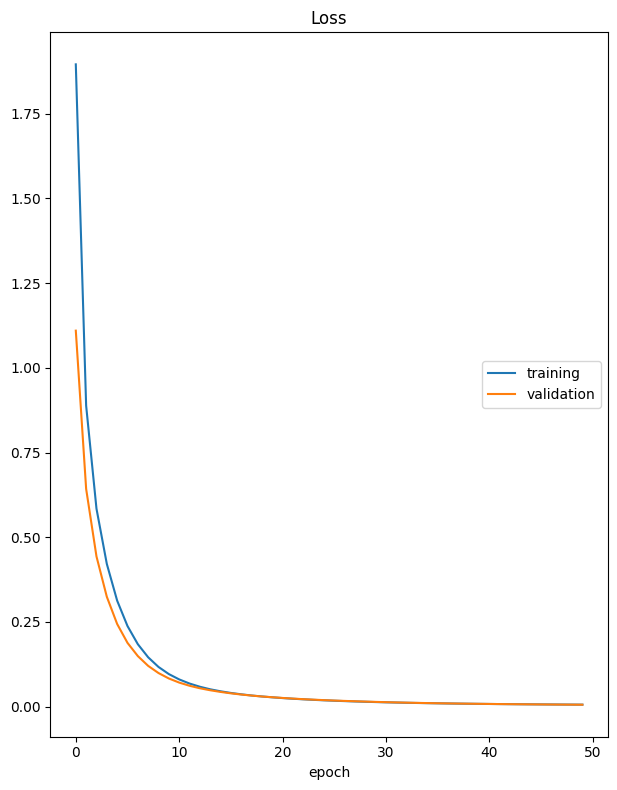

Loss
	training         	 (min:    0.006, max:    1.896, cur:    0.006)
	validation       	 (min:    0.005, max:    1.110, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - val_loss: 0.0055


In [93]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(xTrain.shape[1],)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [94]:
y_pred = model.predict(xTest)

mae = mean_absolute_error(yTest,y_pred)
mse = mean_squared_error(yTest,y_pred)

print('MAE: ', mae)
print('MSE: ', mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE:  0.0569705868323644
MSE:  0.005456833451389345


**Hallazgos:**
1. Después de múltiples intentos se determinó que el mejor modelo de red neuronal de 1 sola capa entrenado tiene los siguientes parámetros:
    - **1 neurona:** Seleccionado a partir de la cantidad de variables de salida o de interés del modelo(output_var = 1).
    - **Función de activación Sigmoide:** Esta función de activación fue elegida dada la naturaleza del problema (predicción de probabilidad) que forza a que la respuesta final de la red neuronal sea una probabilidad entre 0 y 1. 
    -  **Optimizador Stochastic gradient descent (sgd):** Utilizando el optimizador 'sgd' se logra optimizar los valores de los parámetros en la capa oculta de manera óptima.
    - **Función de pérdida - MSE:** Si bien este modelo busca determinar la probabilidad de que un estudiante sea admitido o no a una universidad, las métricas para la evaluación de desempeño estaban relacionadas con un modelo de regresión. Debido a lo anterior, se decidió usar como función de pérdida el error cuadrático medio (MSE) al ser una métrica robusta para la medición del desempeño de problemas de regresión.

**Desempeño del modelo**

Red neuronal 1 sola capa

- MAE: 0.056971
- MSE: 0.005457

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

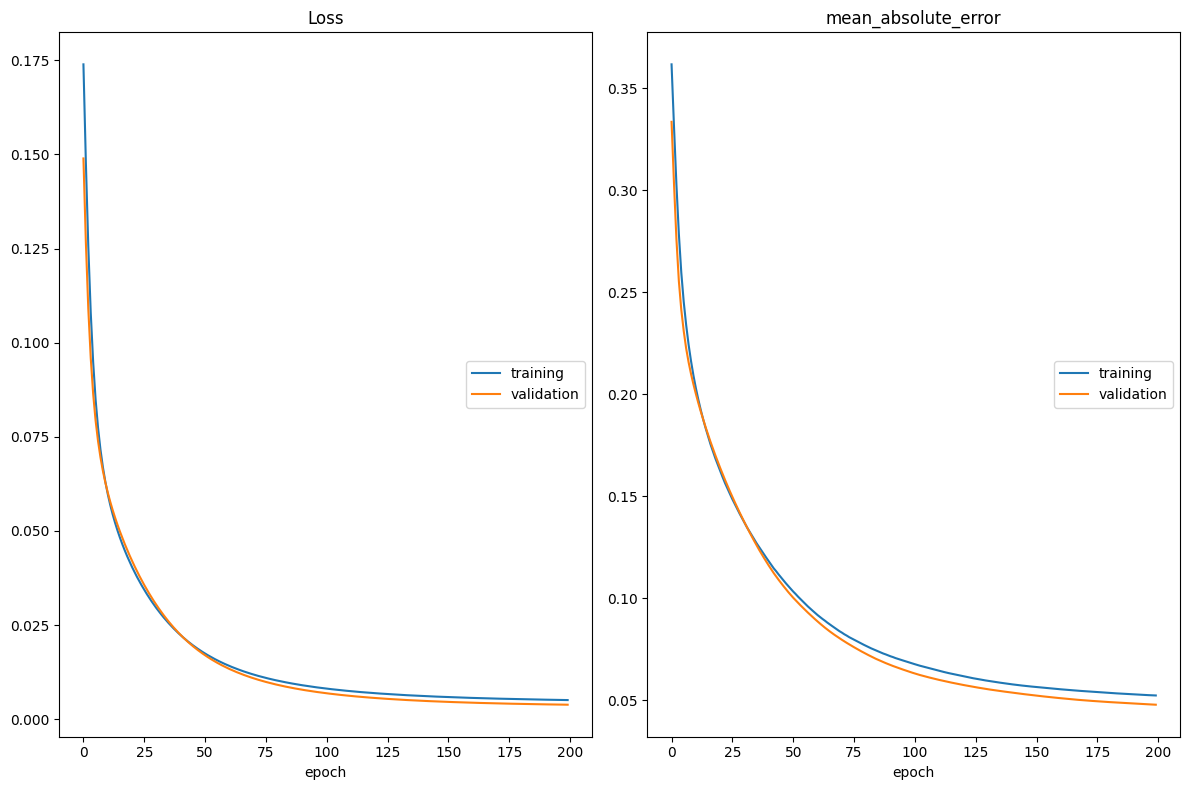

Loss
	training         	 (min:    0.005, max:    0.174, cur:    0.005)
	validation       	 (min:    0.004, max:    0.149, cur:    0.004)
mean_absolute_error
	training         	 (min:    0.052, max:    0.362, cur:    0.052)
	validation       	 (min:    0.048, max:    0.334, cur:    0.048)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0049 - mean_absolute_error: 0.0507 - val_loss: 0.0039 - val_mean_absolute_error: 0.0479


In [95]:
# Correr modelo final
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(10, input_shape=(xTrain.shape[1],)))
model.add(Dense(output_var, activation = 'sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_squared_error', metrics = ['mean_absolute_error'])

# Entrenamiento de la red neuronal con 150 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=200, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [96]:
y_pred = model.predict(xTest)

mae = mean_absolute_error(yTest,y_pred)
mse = mean_squared_error(yTest,y_pred)

print('MAE: ', mae)
print('MSE: ', mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE:  0.04793321485519409
MSE:  0.003872814023830712


**Hallazgos:**
1. Después de múltiples intentos se determino que el mejor modelo de red neuronal multicapa con dos capas es aquel con las siguientes características:
    - **10 neuronas:** Este número de neuronas fue seleccionado ya que sus gráficas de pérdidas no demuestran evidencia overfitting en el modelo.
    - **Función de activación Sigmoide:** Esta función de activación fue elegida dado que forza a que la respuesta final de la red neuronal sea una probabilidad entre 0 y 1. 
    -  **Optimizador Stochastic gradient descent (sgd):** Utilizando el optimizador 'sgd' se logra optimizar los valores de los parámetros de las dos capas, alcanzando la convergencia en los errores de training y validation. Así mismo, se alcanzan valores bajos de errores en el training (0.0044) y en el validation (0.0036).
    - **Función de pérdida - MSE:** Si bien este modelo busca determinar la probabilidad de que un estudiante sea admitido o no a una universidad, las métricas para la evaluación de desempeño estaban relacionadas con un modelo de regresión. Debido a lo anterior, se decidió usar como función de pérdida el error cuadrático medio (MSE) al ser una métrica robusta para la medición del desempeño de problemas de regresión.

    **Desempeño del modelo**

Red neuronal multicapa (dos capas ocultas).

- MAE: 0.04793
- MSE: 0.00387

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [97]:
# Importación librerías
from keras.callbacks import EarlyStopping

In [98]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(7, input_shape=(xTrain.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var, activation='sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [99]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

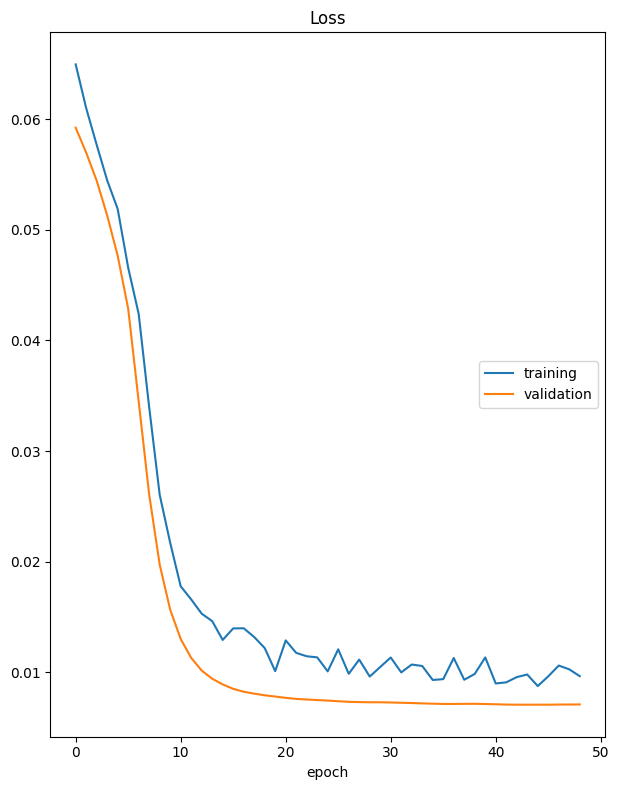

Loss
	training         	 (min:    0.009, max:    0.065, cur:    0.010)
	validation       	 (min:    0.007, max:    0.059, cur:    0.007)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - val_loss: 0.0071
Epoch 49: early stopping


In [101]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping
model.fit(xTrain, yTrain,
          verbose=True, 
          epochs=150, 
          validation_data=(xTest, yTest),
          callbacks=[early_stop, PlotLossesKeras()])

In [102]:
y_pred = model.predict(xTest)

mae = mean_absolute_error(yTest,y_pred)
mse = mean_squared_error(yTest,y_pred)

print('MAE: ', mae)
print('MSE: ', mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE:  0.06105060855547587
MSE:  0.007102037909959309


**Consideraciones para selección de parámetros**

- **Función de perdida:** La función de perdida seleccionada fue el error cuadrático medio, debido a que se trata de un problema de regresión, y a su vez, esta es la métrica empleada para medir el desempeño del modelo.
- **Optimizador:** Se emplea el optimizador 'Adam' que es un método de gradiente descendente estocástico que utiliza una tasa de aprendizaje adaptativa, y que para determinados problemas puede presentar un mejor desempeño que el algoritmo SGD. Se probaron ambos optimizadores en este punto y se obtuvo un mejor desempeño con Adam.
- **Número de épocas:** Se empleo un número de épocas alto (150) debido a que en este caso también se implementó un método de parada temprana y de regularización, por lo que de antemano se espera que el algoritmo detenga su entrenamiento antes de entrar en sobreajuste.
- **Número de neuronas:** Para establecer el número de neuronas se tuvo en cuenta el tamaño del dataset, que al ser pequeño (350 registros de entrenamiento) puede requerir menos neuronas para evitar el sobreajuste, y adicionalmente se realizó la calibración por prueba y error, obteniendo una mejor convergencia para la arquitectura de 2 capas ocultas con 7 neuronas en cada capa.
- **Dropout rate:** Se empleo un rate de 0.2 (20% de neuronas a desactivar) ya que fue el valor que permitía una convergencia y aprendizaje adecuados para el modelo. Un valor mayor en el rate hacía que el modelo se detuviera prematuramente sin obtener un buen desempeño.

Adicionalmente, de acuerdo con el target o la variable independiente a calcular, se emplea la función de activación 'sigmoid' en la capa de salida, ya que esta permite tener salidas con rangos entre 0 y 1 (probabilidad) que coincide con la naturaleza del problema presentado.

**Desempeño del modelo**

Red neuronal multicapa (dos capas ocultas) con regularización Dropout y early stopping:

- MAE: 0.06105
- MSE: 0.00710

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

### Comparación de los Modelos

1. **Red Neuronal de Una Capa:**
    * MAE: 0.0056971
    * MSE: 0.0005457

Este modelo, a pesar de ser simple y contar únicamente con una sola capa, logró resultados decentes. Su simplicidad puede ser una ventaja en términos de eficiencia computacional y facilidad de interpretación. Sin embargo, puede no capturar relaciones más complejas en los datos, lo que se refleja en su rendimiento comparativamente peor en comparación con los modelos multicapa.

2. **Red Neuronal Multicapa (Dos Capas Ocultas):**
    * MAE: 0.004793 
    * MSE: 0.000387
    
La adición de una capa adicional parece mejorar significativamente el rendimiento, logrando el mejor MAE y MSE de los tres modelos, es decir, modela la complejidad de los datos de entrada mejor que primer modelo.

3. **Red Neuronal Multicapa con Regularización (Dropout y Early Stopping):**
    * MAE: 0.006105
    * MSE: 0.000710
    
A pesar de tener un diseño más robusto para evitar el sobreajuste, este modelo no superó al modelo de dos capas en términos de MAE y MSE. Con los nuevos parámetros puede que la capacidad del modelo para aprender de los datos se limite.

**Conclusión**

El modelo de dos capas ocultas sin regularización adicional fue el que mejor resultados obtuvo en términos de MAE y MSE. Esto sugiere que para este conjunto de datos, un modelo ligeramente más complejo (pero no demasiado regularizado) es beneficioso para capturar las dinámicas subyacentes de los datos sin caer en sobreajuste.

Las desventajas del modelo de una capa incluyen su incapacidad para capturar relaciones más complejas en los datos, lo que resulta en un rendimiento inferior. Por otro lado, el modelo con dropout y early stopping, aunque diseñado para ser robusto, parece haber sido limitado por estas mismas protecciones, posiblemente deteniendo el entrenamiento demasiado pronto o desactivando demasiadas neuronas durante el entrenamiento, lo que podría haber impedido que aprendiera patrones cruciales en los datos.